In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Social_Network_Ads.csv')

In [6]:
df = df.iloc[:,2:]

In [7]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [9]:
df.sample(5)
 df.drop('Purchased', axis=1)

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [12]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.3, random_state=0)

X_train.shape,X_test.shape

((280, 2), (120, 2))

# Standardization using StandardScaler

In [15]:


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [17]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [18]:
# we get numpy array from standard scaler so we have to convert it back to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [19]:
X_train_scaled.head()

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047


In [20]:
X_train_scaled.head()

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047


In [21]:
X_train.describe()

,Age,EstimatedSalary
count,280.000000,280.000000
mean,37.864286,69807.142857
std,10.218201,34641.201654
min,18.000000,15000.000000
25%,30.000000,43000.000000
50%,37.000000,70500.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [23]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effect of Scaling

Text(0, 0.5, 'Estimated_Salary')

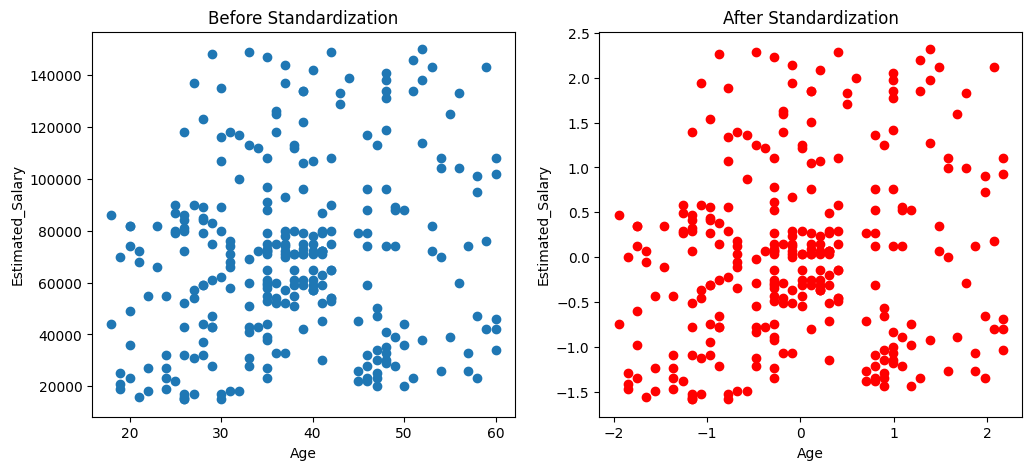

In [27]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before Standardization')
ax1.set_xlabel('Age')
ax1.set_ylabel('Estimated_Salary')

ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title('After Standardization')
ax2.set_xlabel('Age')
ax2.set_ylabel('Estimated_Salary')

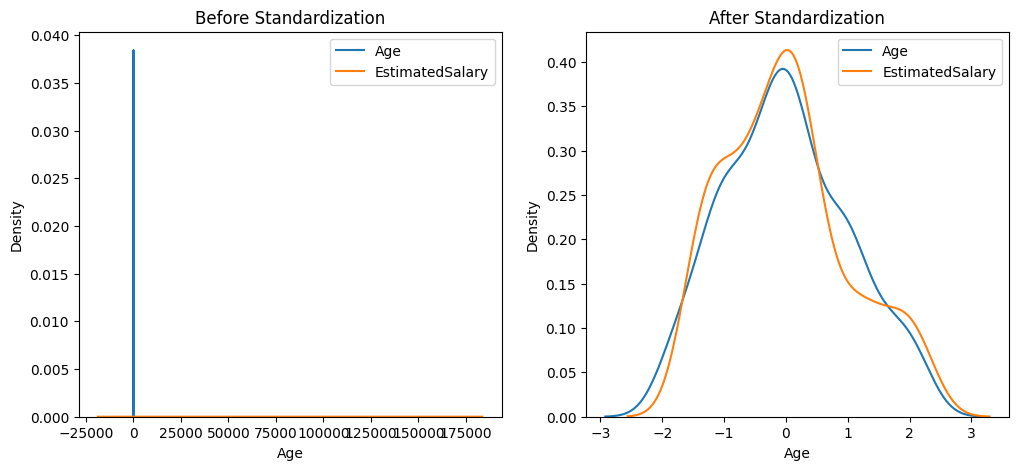

In [28]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

# before scaling
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)
ax1.set_title('Before Standardization')
ax1.legend(['Age','EstimatedSalary'])
# after scaling
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
ax2.set_title('After Standardization')
ax2.legend(['Age','EstimatedSalary'])
plt.show()

## Importance of Scaling

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [31]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [32]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [36]:
# standardization is important for distance based algorithms like KNN, SVM, Kmeans etc
# but not for tree based algorithms like DecisionTree, RandomForest, XGBoost etc
# Apply standarization when working with algorithms like KNNs,Kmeans,PCA, Artificial Neural Networks, Gradient Descent 
# it does not remove effect of outliers

In [ ]:
# if we can think of standardization in a large dataset it will help in faster convergence of the model
# if the features are in different scales then it will be difficult for the model to converge
# if the features are in same scale then it will be easy for the model to converge
# if the features are in same scale then it will be easy for the model to converge

# NORMALIZATION

it is of several types:
1. Min-Max Scaling
2. Mean normalization
3. Max Absolute (maxabs) normalization
4. Robust scaling


In [37]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns = ['Class label','Alcohol','Malic acid']

In [44]:
df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

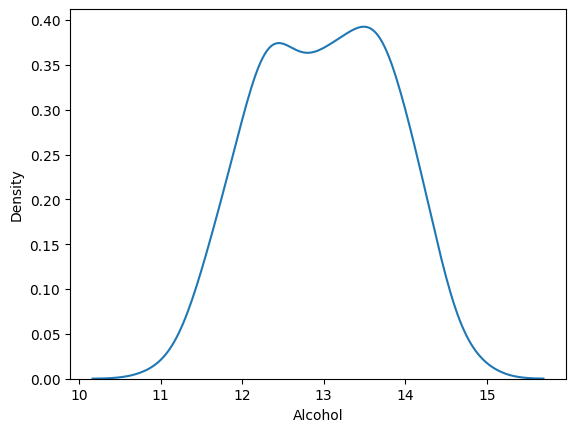

In [45]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

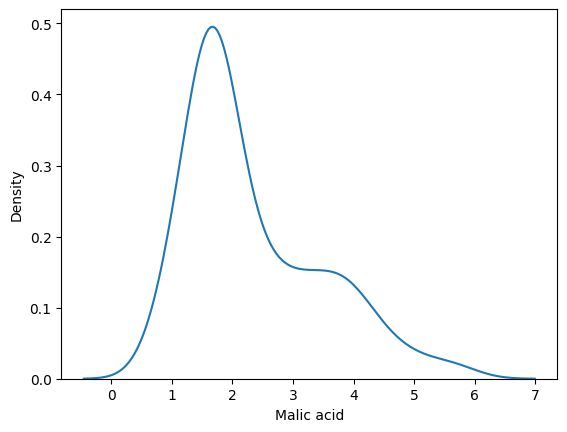

In [46]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

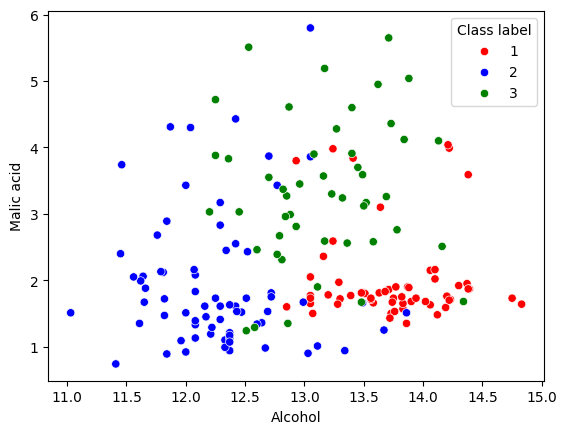

In [47]:
color_dict = {1:'red',2:'blue',3:'green'}
sns.scatterplot(x='Alcohol',y='Malic acid',data=df,hue='Class label',palette=color_dict)

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Class label', axis =1),df['Class label'],test_size=0.3,random_state=0)

In [50]:
X_train.shape,X_test.shape

((124, 2), (54, 2))

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# fit the scaler on the training data so that it understands the parameters of scaling 
scaler.fit(X_train)

# transform the testing and training data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [53]:
X_test_scaled,X_train_scaled

(array([[ 0.72849462,  0.16386555],
        [ 0.47311828,  0.37394958],
        [ 0.36021505,  0.05042017],
        [ 0.68010753,  0.17647059],
        [ 0.54301075,  1.03151261],
        [ 0.14247312,  0.24369748],
        [ 0.81451613,  0.26470588],
        [ 0.35752688,  0.61764706],
        [ 0.32795699,  0.17647059],
        [ 0.28225806,  0.19747899],
        [ 0.62634409,  0.35084034],
        [ 0.76612903,  0.87184874],
        [ 0.85215054,  0.18277311],
        [ 0.36021505,  0.03781513],
        [ 0.68548387,  0.35504202],
        [ 0.26075269,  0.00630252],
        [ 0.73387097,  0.13445378],
        [ 0.84946237,  0.14705882],
        [ 0.4327957 ,  0.0987395 ],
        [ 0.75268817,  0.15966387],
        [ 0.55913978,  0.02521008],
        [ 0.54301075,  0.15966387],
        [ 0.59408602,  0.35714286],
        [ 0.39784946,  0.17647059],
        [ 0.34946237,  0.04411765],
        [ 0.40053763,  0.32352941],
        [ 0.37634409,  0.13445378],
        [ 0.30376344,  0.151

In [55]:
# since we get numpy array from minmaxscaler we have to convert it back to dataframe

X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)
X_train_scaled.head()

,Alcohol,Malic acid
0,0.720430,0.203782
1,0.319892,0.084034
2,0.602151,0.712185
3,0.572581,0.563025
4,0.760753,0.130252


In [57]:
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [58]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


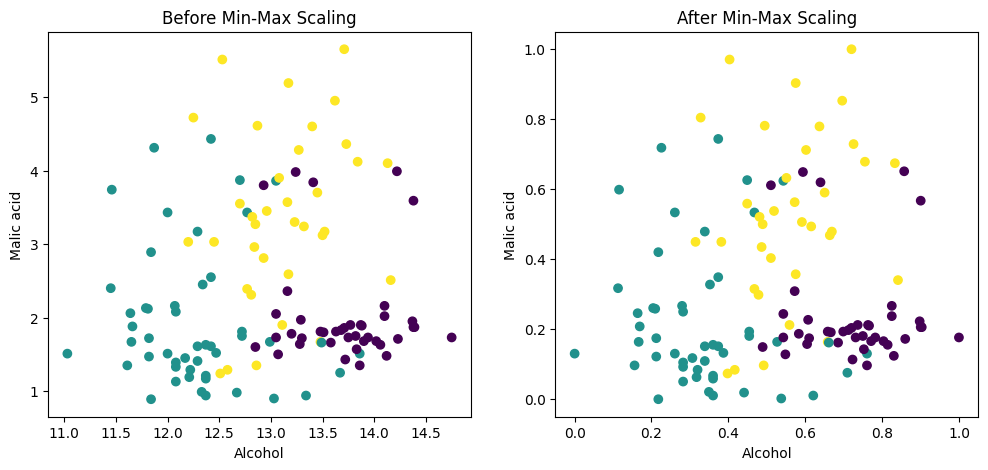

In [60]:
fig , (ax1,ax2 )= plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Alcohol'],X_train['Malic acid'],c=y_train)
ax1.set_title('Before Min-Max Scaling')
ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Malic acid')
ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic acid'],c=y_train)
ax2.set_title('After Min-Max Scaling')
ax2.set_xlabel('Alcohol')
ax2.set_ylabel('Malic acid')
plt.show()

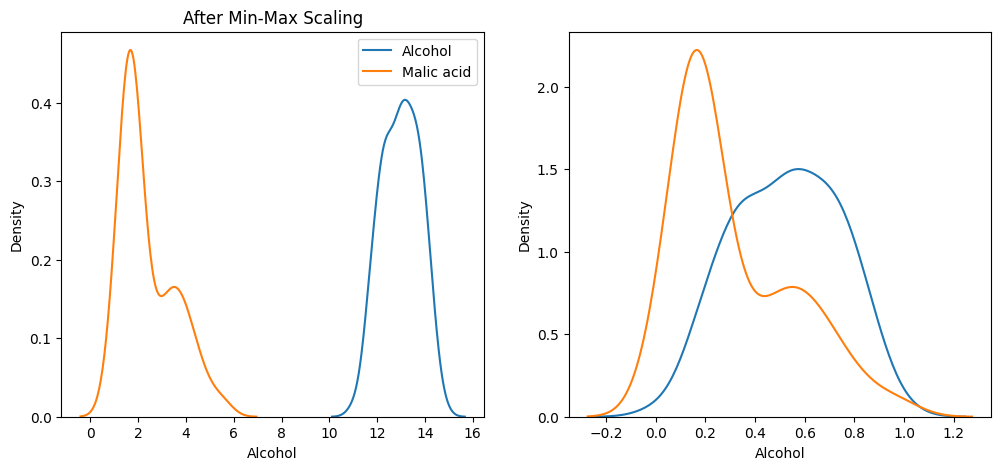

In [62]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

# before scaling
sns.kdeplot(X_train['Alcohol'],ax=ax1)
sns.kdeplot(X_train['Malic acid'],ax=ax1)
ax1.set_title('Before Min-Max Scaling')
ax1.legend(['Alcohol','Malic acid'])
# after scaling
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'],ax=ax2)
ax1.set_title('After Min-Max Scaling')
ax1.legend(['Alcohol','Malic acid'])
plt.show()